In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

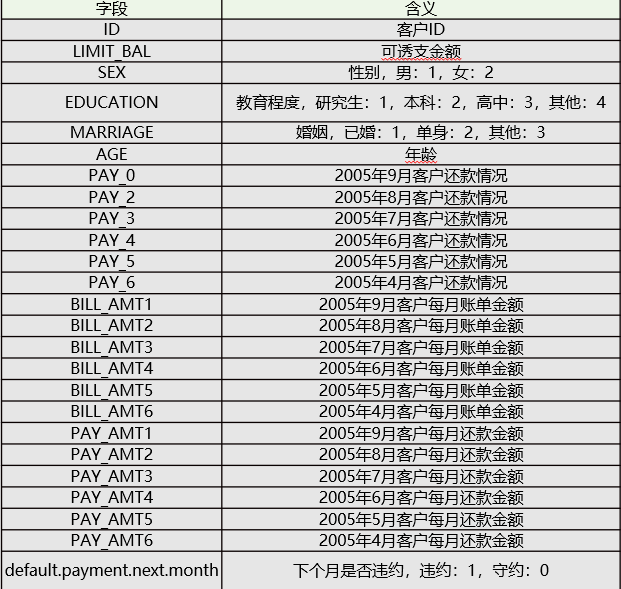

## 思路
1. ID是否删除？不确定ID和时间是否有关系，可考虑在分析特征重要性后再考虑是否删除。
2. 年龄、婚姻情况、教育程度、性别考虑特征交互。

## 加载数据

In [2]:
path = './data/UCI_Credit_Card.csv'
data = pd.read_csv(path)
data.rename(columns={'default.payment.next.month': 'label'}, inplace=True)
data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 数据预处理

In [5]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [6]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [7]:
# 去除ID字段
data.drop('ID', inplace=True, axis=1)

In [8]:
# Onehot编码处理
# EDUCATION，0归到Unknown(6)
data['EDUCATION'][data['EDUCATION']==0] = 6
tmp = pd.get_dummies(data['EDUCATION'], prefix='edu')
data.drop('EDUCATION', inplace=True, axis=1)
data = pd.concat([data, tmp], axis=1)
# MARRIAGE，0归到Unknown(3)
data['MARRIAGE'][data['MARRIAGE']==0] = 3  
tmp = pd.get_dummies(data['MARRIAGE'], prefix='marg')
data.drop('MARRIAGE', inplace=True, axis=1)
data = pd.concat([data, tmp], axis=1)
data.sample(3)

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6,marg_1,marg_2,marg_3
12169,120000.0,2,58,1,-1,-1,-2,-2,-1,0.0,2228.0,0.0,0.0,0.0,672.0,2228.0,0.0,0.0,0.0,672.0,2507.0,1,0,0,1,0,0,0,1,0,0
27583,360000.0,1,51,-1,-1,-1,-1,-1,-1,2782.0,5608.0,923.0,12886.0,489.0,172.0,5636.0,927.0,12950.0,491.0,173.0,7144.0,0,1,0,0,0,0,0,1,0,0
20778,270000.0,1,32,0,0,0,0,0,0,47116.0,47771.0,51414.0,52993.0,54962.0,56523.0,2000.0,5000.0,3000.0,4000.0,3000.0,3000.0,0,1,0,0,0,0,0,0,1,0


In [9]:
data['label'].value_counts()

0    23364
1     6636
Name: label, dtype: int64

## 使用GridSearchCV和Pipeline进行训练与预测

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [11]:
# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1).values, data['label'].values, 
                                                    test_size=0.3, random_state=2021)

In [12]:
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score):
    gridsearch = GridSearchCV(estimator=pipeline, param_grid=model_param_grid, scoring=score)
    search = gridsearch.fit(train_x, train_y)
#     print('GridSearchCV最优参数：', search.best_params_)
    print('GridSearchCV最优分数：', search.best_score_)
    pre_y = gridsearch.predict(test_x)
#     print(f'准确率为{accuracy_score(test_y, pre_y):.4f}')
    res = {}
    res['predict_y'] = pre_y
    res['accuracy_score'] = accuracy_score(test_y, pre_y)
    res['best_params'] = search.best_params_
    return res

In [16]:
classifiers = [DecisionTreeClassifier(), SVC(), LogisticRegression(), RandomForestClassifier()]
classifier_names = ['decisiontreeclf', 'svc', 'lr', 'randomforestclf']
classifier_param_grid = [
    {'decisiontreeclf__max_depth': [3, 5, 7, 9]},
    {'svc__C': [0.5, 1], 'svc__gamma': [0.01, 0.05, 0.1]},
    {'lr__C': [0.5, 1, 1.5, 2]},
    {'randomforestclf__n_estimators': [5, 10, 15], 'randomforestclf__max_depth': [3, 5, 7]}
]

In [17]:
%%time
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, X_train, y_train, X_test, y_test, model_param_grid , score='accuracy')
    print(f"{model_name}的预测准确率为：{result['accuracy_score']:.4f}，最优参数为：{result['best_params']}\n")

GridSearchCV最优分数： 0.8197142857142857
decisiontreeclf的预测准确率为：0.8250，最优参数为：{'decisiontreeclf__max_depth': 3}

GridSearchCV最优分数： 0.8171904761904762
svc的预测准确率为：0.8208，最优参数为：{'svc__C': 1, 'svc__gamma': 0.05}

GridSearchCV最优分数： 0.8087619047619047
lr的预测准确率为：0.8144，最优参数为：{'lr__C': 1.5}

GridSearchCV最优分数： 0.8162857142857142
randomforestclf的预测准确率为：0.8231，最优参数为：{'randomforestclf__max_depth': 7, 'randomforestclf__n_estimators': 10}

CPU times: user 11min 42s, sys: 12.3 s, total: 11min 54s
Wall time: 10min 29s


## 数据分布

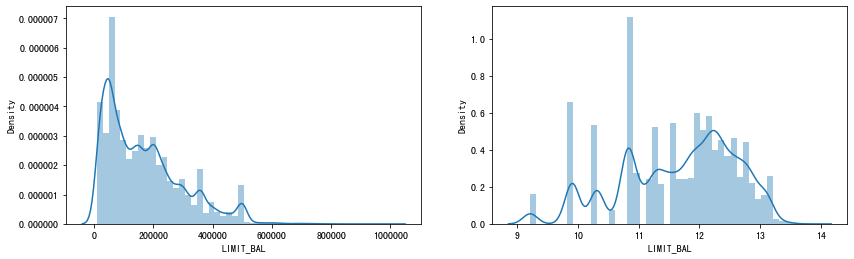

In [21]:
# LIMIT_BAL 可透支额度，明显右偏
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.distplot(data['LIMIT_BAL'], ax=ax[0])
sns.distplot(np.log(data['LIMIT_BAL']), ax=ax[1]);

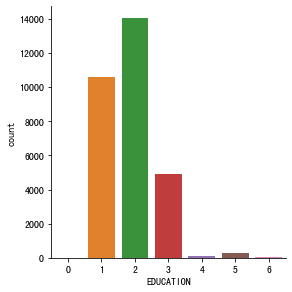

In [31]:
# EDUCATION, 女性占比比较大
sns.catplot(x='EDUCATION', kind='count', data=data, height=4);

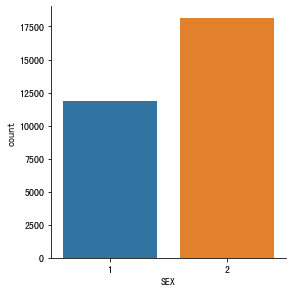

In [27]:
# SEX, 女性占比比较大
sns.catplot(x='SEX', kind='count', data=data, height=4);

In [50]:
# def preprocess(data):
#     data = data.copy()
#     cols = data.columns
#     pay_feas = [f for f in cols if re.match('PAY_\d$', f)]
#     data[pay_feas] += 1  # 使还款字段与数据描述一致
#     for f in pay_feas:
#         data[f.replace('PAY', 'default')] = data[f].apply(lambda x:)
#     return data
    